---
# Guia Detección de Anomalías

En este notebook, cubriremos lo siguiente:

- Qué es la detección de anomalías
- Implementación en Python
- Algoritmos disponibles

**Qué es la detección de anomalías**

La detección de anomalías, también conocida como detección de valores atípicos o anomalías, es una técnica en el análisis de datos que se utiliza para identificar patrones inusuales, raros o excepcionales en un conjunto de datos. Estas anomalías pueden ser puntos de datos que se desvían significativamente de la mayoría de los otros puntos en el conjunto de datos, o patrones que son inusuales en relación con el resto de los datos.

La detección de anomalías tiene aplicaciones en una variedad de campos, incluyendo la detección de fraudes en transacciones financieras, el monitoreo de la salud de equipos industriales, la seguridad de redes informáticas, la detección de intrusiones, la identificación de enfermedades médicas poco comunes y la monitorización del comportamiento del usuario en aplicaciones en línea.

Hay varios enfoques y técnicas para la detección de anomalías, entre los que se incluyen:

- **Métodos estadísticos**: Estos métodos utilizan medidas estadísticas como la desviación estándar, la distancia Mahalanobis o las pruebas de hipótesis para identificar puntos de datos que se desvían significativamente de la distribución de los datos.

- **Métodos basados en modelos**: Estos métodos construyen un modelo probabilístico de los datos y luego identifican puntos que tienen una baja probabilidad bajo el modelo. Ejemplos incluyen los modelos Gaussianos Mixtos, modelos de mezcla de distribuciones, o modelos de Redes Bayesianas.

- **Métodos basados en vecinos**: Estos métodos buscan anomalías examinando la relación entre un punto de datos y sus vecinos en el espacio de características. Por ejemplo, el algoritmo K-nearest neighbors (KNN) puede identificar puntos que están lejos de la mayoría de sus vecinos.

- **Métodos basados en densidad**: Estos métodos buscan anomalías examinando la densidad local de los puntos de datos en el espacio de características. Ejemplos incluyen el algoritmo LOF (Local Outlier Factor) y DBSCAN (Density-Based Spatial Clustering of Applications with Noise).

- **Aprendizaje no supervisado**: Algunas técnicas de clustering pueden utilizarse para identificar anomalías al considerar puntos de datos que no se agrupan bien con otros puntos.

Es importante tener en cuenta que la detección de anomalías es un desafío en muchos casos, ya que las anomalías pueden ser extremadamente raras y pueden variar en naturaleza. Además, lo que se considera una anomalía puede depender del contexto y del problema específico en cuestión. Por lo tanto, la selección y la aplicación de métodos de detección de anomalías deben realizarse cuidadosamente, teniendo en cuenta las características y los objetivos de los datos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [2]:
# Generar datos de ejemplo (datos normales)
np.random.seed(42)
X_normal = 0.3 * np.random.randn(100, 2)

# Generar algunos datos de ejemplo como anomalías
np.random.seed(42)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Combinar datos normales y anomalías
X = np.concatenate([X_normal, X_outliers], axis=0)


Vamos a utilizar el algoritmo **LocalOutlierFactor** para detectar los puntos anómalos

In [6]:
# instanciamos el algoritmo LOF
lof = LocalOutlierFactor(n_neighbors=20)

# entrenamos el algoritmo
y_pred = lof.fit_predict(X)



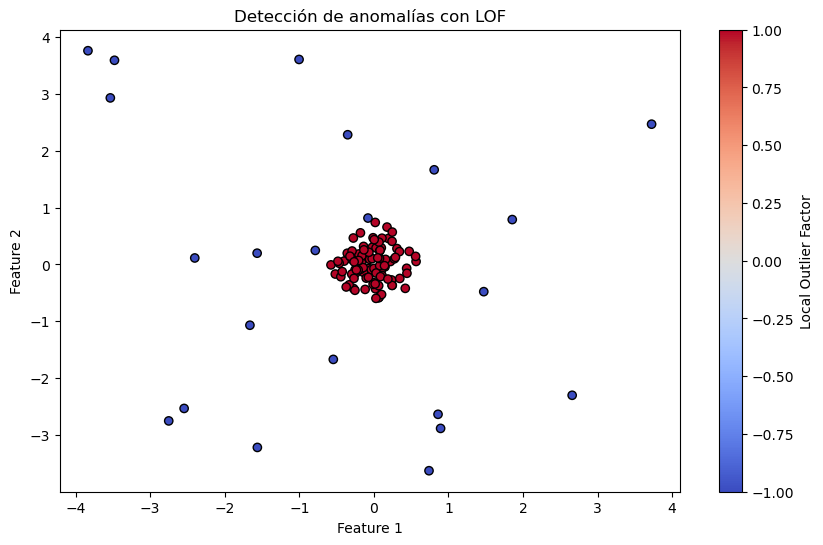

In [8]:
# visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.title('Detección de anomalías con LOF')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Local Outlier Factor')
plt.show()

Ahora vamos a conocer otros algoritmos para la detección de anomalías.

**Isolation Forest**

Este algoritmo se basa en la construcción de árboles de decisión aleatorios para aislar las anomalías más rápidamente que los puntos de datos normales.
Es muy eficiente computacionalmente y puede manejar conjuntos de datos grandes con muchas dimensiones.
Se basa en la idea de que las anomalías son más propensas a ser "aisladas" en el espacio de características que los puntos de datos normales.

In [11]:
from sklearn.ensemble import IsolationForest

In [12]:
# Aplicar el algoritmo Isolation Forest para detectar anomalías
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
y_pred = isolation_forest.fit_predict(X)

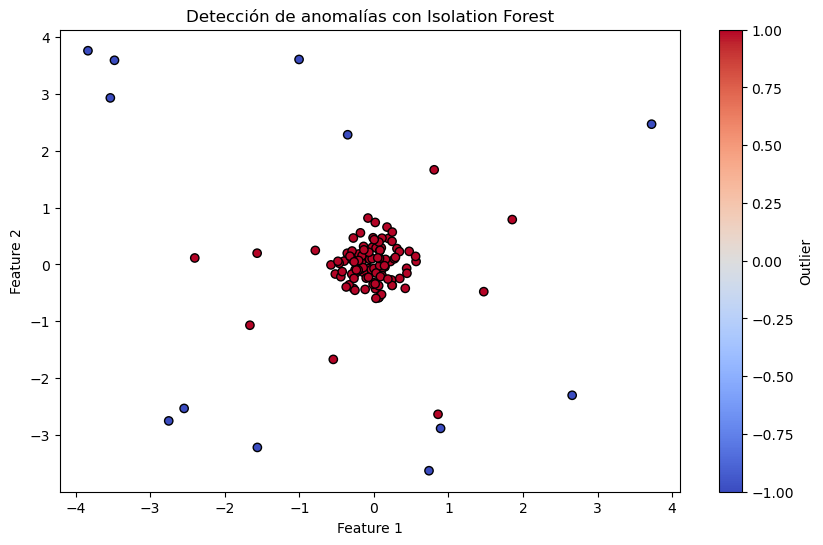

In [15]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.title('Detección de anomalías con Isolation Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Outlier')
plt.show()

Puedes ajustar el parámetro contamination según la proporción de anomalías esperadas en tus datos. También puedes experimentar con otros parámetros del Isolation Forest, como n_estimators o max_samples, según sea necesario para tu conjunto de datos específico

In [ ]:
# Utiliza varios valores en el parámetro de contaminación
# ¿Qué sucede si se aumenta o disminuye?
from pprint import pprint

contamination_values = [0.02, 0.05, 0.10, 0.20]
resultados_iso = {}

for c in contamination_values:
    iso_tmp = IsolationForest(contamination=c, random_state=42)
    y_tmp = iso_tmp.fit_predict(X)
    n_outliers = (y_tmp == -1).sum()
    resultados_iso[c] = {
        'outliers_detectados': int(n_outliers),
        'porcentaje_outliers': round(n_outliers / len(X) * 100, 2)
    }
    print(f"contamination={c}: outliers detectados = {n_outliers} de {len(X)}")

print("\nResumen resultados (Isolation Forest):")
pprint(resultados_iso)

**One-Class SVM (Support Vector Machine)**

Este algoritmo entrena un modelo de máquina de vectores de soporte en una clase y luego determina la región en la que se encuentran la mayoría de los datos.
Los puntos que se encuentran fuera de esta región se consideran anomalías. Es útil cuando tienes una cantidad limitada de datos de una clase y deseas identificar puntos que difieren significativamente de esos datos.

In [21]:
from sklearn.svm import OneClassSVM

In [23]:
# Aplicar el algoritmo One-Class SVM para detectar anomalías
one_class_svm = OneClassSVM(nu=0.1)
y_pred = one_class_svm.fit_predict(X)

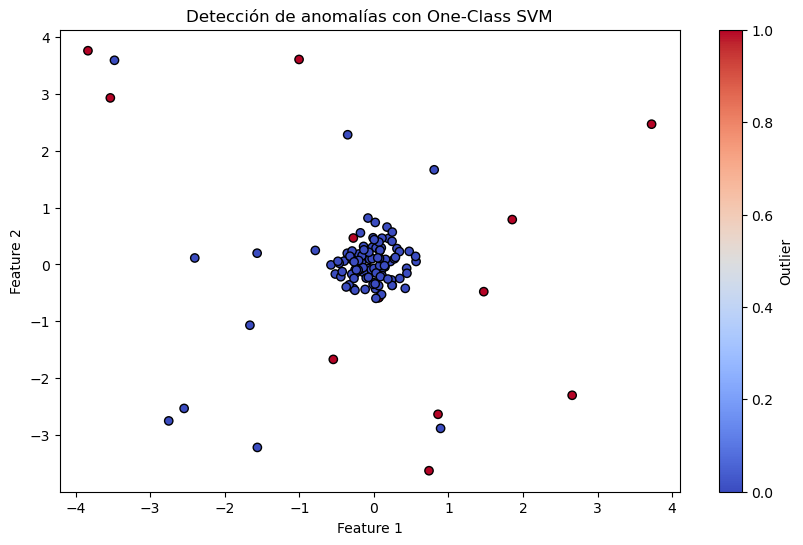

In [25]:
# Convertir las predicciones (-1 para anomalías, 1 para datos normales) a 0 para anomalías y 1 para datos normales
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.title('Detección de anomalías con One-Class SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Outlier')
plt.show()

Al igual que con el Isolation Forest, puedes ajustar el parámetro nu según la proporción de anomalías esperadas en tus datos. También puedes experimentar con otros parámetros del One-Class SVM según sea necesario para tu conjunto de datos específico.

In [ ]:
# utiliza varios valores para el parámetro nu
# ¿Qué sucede cuando este aumenta o disminuye?
nu_values = [0.01, 0.05, 0.10, 0.20, 0.30]

for nu in nu_values:
    oc_tmp = OneClassSVM(nu=nu)
    y_tmp = oc_tmp.fit_predict(X)
    n_outliers = (y_tmp == -1).sum()
    print(f"nu={nu}: outliers detectados = {n_outliers} de {len(X)}")

**Clustering de k-medias de kernel**

Es una variante del algoritmo de k-medias que utiliza una función kernel para agrupar los datos en un espacio de características de mayor dimensión.
Se puede utilizar para detectar anomalías al agrupar los datos y luego identificar puntos que no se ajustan bien a ningún clúster.

In [31]:
from sklearn.cluster import SpectralClustering

In [46]:
# Aplicar clustering de k-medias de kernel
# Nota extra para usuarios de MAC, si sale error: pip install --upgrade threadpoolctl (Si usas conda:  conda update threadpoolctl)
# Si error persiste: conda update scikit-learn numpy
kmeans_kernel = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
y_pred = kmeans_kernel.fit_predict(X)

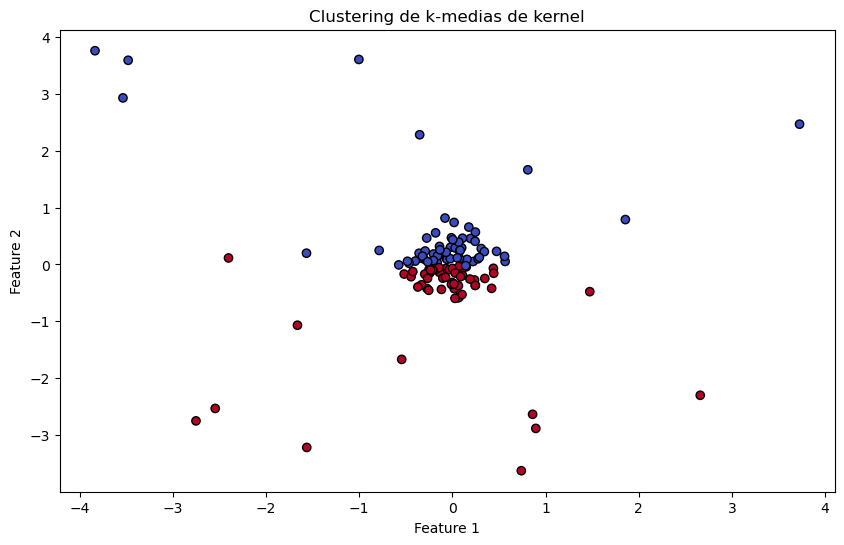

In [35]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.title('Clustering de k-medias de kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# utiliza varios valores para el parámetro n_clusters
# ¿Qué sucede cuando este aumenta o disminuye?
cluster_values = [2, 3, 4, 5]

for k in cluster_values:
    spec_tmp = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', assign_labels='kmeans')
    labels_tmp = spec_tmp.fit_predict(X)
    unique, counts = np.unique(labels_tmp, return_counts=True)
    print(f"n_clusters={k} -> tamaños de clusters: {dict(zip(unique, counts))}")

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

Aunque DBSCAN es conocido principalmente como un algoritmo de clustering, también se puede utilizar para la detección de anomalías.
Identifica puntos que están en regiones de baja densidad, lo que puede indicar la presencia de anomalías o valores atípicos.
Es especialmente útil para detectar anomalías en conjuntos de datos donde las anomalías forman grupos densos.

In [40]:
from sklearn.cluster import DBSCAN

In [42]:
# Aplicar el algoritmo DBSCAN para detectar anomalías
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred = dbscan.fit_predict(X)

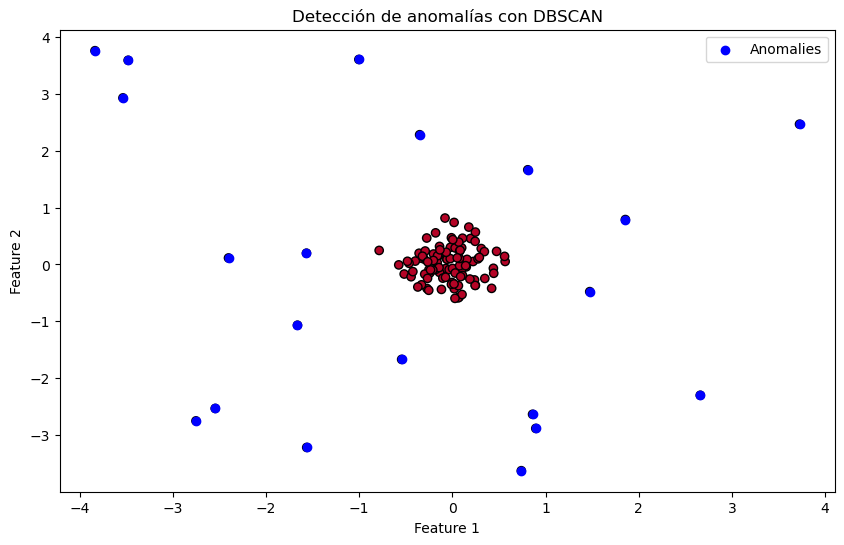

In [44]:
# Identificar los puntos de datos que son anomalías (ruido)
anomaly_mask = y_pred == -1

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.scatter(X[anomaly_mask, 0], X[anomaly_mask, 1], color='blue', label='Anomalies')
plt.title('Detección de anomalías con DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Puedes ajustar los parámetros eps y min_samples según las características de tu conjunto de datos para obtener mejores resultados en la detección de anomalías con DBSCAN.

In [ ]:
# utiliza varios valores para los parámetros eps y min_samples
# ¿Qué sucede cuando estos aumentan o disminuyen?
eps_values = [0.2, 0.5, 0.8, 1.0]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for ms in min_samples_values:
        db_tmp = DBSCAN(eps=eps, min_samples=ms)
        labels_tmp = db_tmp.fit_predict(X)
        n_outliers = (labels_tmp == -1).sum()
        print(f"eps={eps}, min_samples={ms}: anomalías detectadas = {n_outliers} de {len(X)}")

### Conclusiones

Como se peude apreciar, cada algoritmo tiene sus fortalezas. ¿Qué algoritmo es el que presentó un mejor resultado?


In [ ]:
# sus conclusiones
print("Conclusiones sobre los algoritmos de detección de anomalías:\n")
print("- LOF detecta bien puntos alejados de las nubes principales, "
      "pero es sensible a la elección de n_neighbors.")
print("- Isolation Forest es eficiente y escala bien; el parámetro 'contamination' "
      "controla cuántos puntos marcará como anómalos.")
print("- One-Class SVM modela la 'frontera' de la distribución normal; el parámetro 'nu' "
      "ajusta la proporción máxima de outliers esperados.")
print("- Métodos de clustering (SpectralClustering, DBSCAN) permiten ver estructuras "
      "en los datos y tratar puntos fuera de los clusters densos como anomalías.")
print("- En este ejemplo sintético, todos los métodos distinguen razonablemente bien "
      "los puntos generados como outliers, pero la cantidad exacta de anomalías "
      "depende fuertemente de los hiperparámetros.")
print("\nEn un problema real, la elección del algoritmo y de los parámetros debe "
      "basarse en el contexto del negocio, el costo de falsos positivos/negativos "
      "y validación con datos etiquetados cuando sea posible.")

---